In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using .Src

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [2]:
# set true model parameters: convergence to plant-free equilibrium
a_true = 1.5 # right of bifurcation point
m_true = 0.45
n0_true = 0.2
w0 = 1.95
M = 100 # number of measurements
noise = 0.1

# create parameter object for trial
hprm = Hyperprm(w0, n0_true, a_true, m_true, M, noise);

In [2]:
# infer a,m parameter
prm_keys = [:a, :m]

# observation time window fixed
t_fixed = true

true

In [4]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

(mle = [1.4951596531059144, 0.4347560447186951], plot_mles = Plot{Plots.GRBackend() n=12}, plot_losses = Plot{Plots.GRBackend() n=3}, cor = [1.0 -0.045890710681321605; -0.045890710681321625 1.0], cov = [0.001025427078510745 -0.0003211723487519444; -0.0003211723487519445 0.04776633795296469], gaussian_heatmap = Plot{Plots.GRBackend() n=1}, gaussian_surface = Plot{Plots.GRBackend() n=2})

In [5]:
r.mle

2-element Vector{Float64}:
 1.4951596531059144
 0.4347560447186951

In [6]:
r.cov

2×2 Matrix{Float64}:
  0.00102543   -0.000321172
 -0.000321172   0.0477663

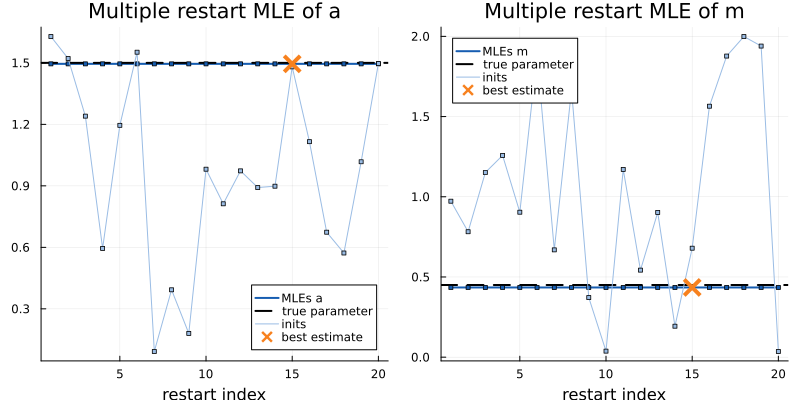

In [7]:
r.plot_mles

#### try less noise

In [3]:
# set true model parameters: convergence to plant-free equilibrium
a_true = 1.5 # right of bifurcation point
m_true = 0.45
n0_true = 0.2
w0 = 1.95
M = 100 # number of measurements
noise = 0.01

# create parameter object for trial
hprm = Hyperprm(w0, n0_true, a_true, m_true, M, noise);

In [4]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

(mle = [1.5014046934504026, 0.47866899992871687], plot_mles = Plot{Plots.GRBackend() n=12}, plot_losses = Plot{Plots.GRBackend() n=3}, cor = [1.0 -0.051473477925463175; -0.051473477925463175 1.0], cov = [0.00010250494991813439 -5.765137917477631e-5; -5.765137917477631e-5 0.012237917974198147], gaussian_heatmap = Plot{Plots.GRBackend() n=1}, gaussian_surface = Plot{Plots.GRBackend() n=2})

In [5]:
r.mle

2-element Vector{Float64}:
 1.5014046934504026
 0.47866899992871687

In [6]:
r.cov

2×2 Matrix{Float64}:
  0.000102505  -5.76514e-5
 -5.76514e-5    0.0122379

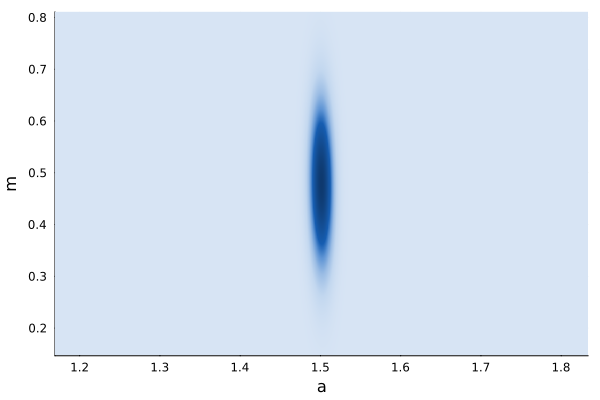

In [7]:
r.gaussian_heatmap

In [8]:
# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], hprm, t_fixed=t_fixed)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

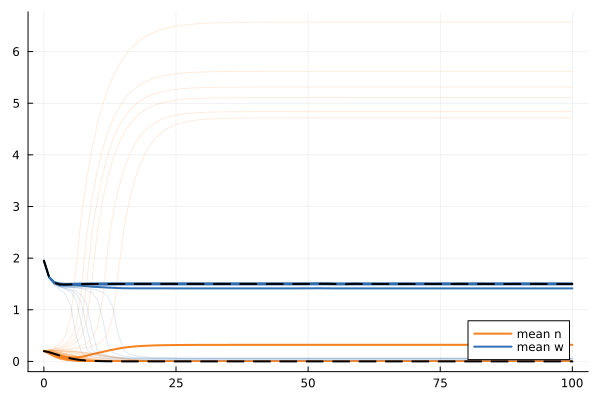

In [9]:
rf.trajectories

why? is noise really that big that unstable branch is trespassed?

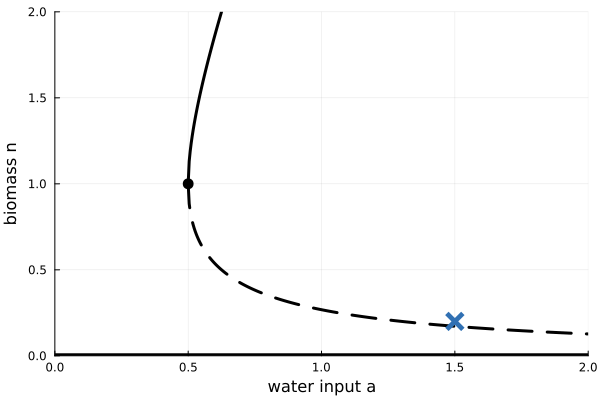

In [23]:
bif_plot(0.25,"n", points=[[1.5,0.2]])

For noise = 0.0:
- variance of m = 0.77
- values of m party > 2 -> different bifurcation diagram with two unstable branchens, trajectories blow up!

Conclusion: a,m not inferable (independently of noise)

### infer only a

In [10]:
prm_keys = [:a]

1-element Vector{Symbol}:
 :a

In [11]:
# set true model parameters: convergence to plant-free equilibrium
a_true = 1.5 # right of bifurcation point
m_true = 0.45
n0_true = 0.2
w0 = 1.95
M = 100 # number of measurements
noise = 0.1

# create parameter object for trial
hprm = Hyperprm(w0, n0_true, a_true, m_true, M, noise);

In [12]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

(mle = [1.5057102413383714], plot_mles = Plot{Plots.GRBackend() n=6}, plot_losses = Plot{Plots.GRBackend() n=3}, cor = [1.0;;], cov = [0.0010229769752145067;;], gaussian_heatmap = nothing, gaussian_surface = Plot{Plots.GRBackend() n=1})

In [13]:
# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], hprm, t_fixed=t_fixed)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

In [15]:
r.cov

1×1 Matrix{Float64}:
 0.0010229769752145067

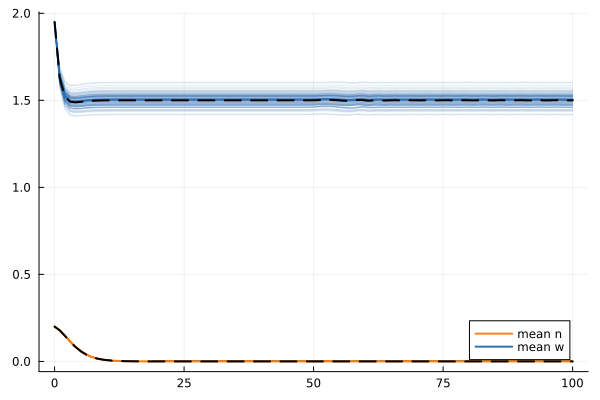

In [14]:
rf.trajectories